<a href="https://colab.research.google.com/github/al00pes/Homologacao_sprint_II/blob/main/MVP_Sprint_II_Arthur_Lopes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MVP Sprint II:**

Classifição de faixa de preço de celular para uma fabricante lançar o produto no mercado

Autor:  Arthur Lopes.

# 1. Definição do problema

**Introdução**

Bob abriu sua própria empresa de telefonia móvel. Ele quer lutar duramente contra grandes empresas como Apple, Samsung etc.

Ele não sabe estimar o preço dos celulares que sua empresa cria. Neste competitivo mercado de telefonia móvel, você não pode simplesmente assumir as coisas. Para resolver esse problema, ele coleta dados de vendas de telefones celulares de várias empresas.

Bob quer descobrir alguma relação entre as características de um telefone celular (por exemplo:- RAM, memória interna, etc.) e seu preço de venda. Mas ele não é tão bom em Machine Learning. Então ele precisa de sua ajuda para resolver este problema.

Neste problema, você não precisa prever o preço real, mas uma faixa de preço que indica quão alto é o preço

Descrições da variavel contida no dataset:

* Battery_power = Energia total que uma bateria pode armazenar em um tempo medido em mAh

* **Blue** = Tem bluetooth ou não

* **clock_speed** = velocidade na qual o microprocessador executa instruções

* **dual_sim** = Tem suporte para dois chip ou não

* **FC** = Mega Pixels da câmera frontal

* **four_g** = Tem suporte a 4G ou não

* **int_memory** = Memoria internal em Gb

* **m_dep** = Profundida do celular em CM

* **Mobile_wt** = Peso do celular

* **n_cores** = Numeros de nucleos do processador

* **PC** = Mega Pixels em câmera digital

* **px_height** = Tamanho da resolução dos pixels

* **px_width** = Largura da resolução do pixels

* **ram** = Memoria de acesso aleatório em Mb

* **sc_h** = Altura da tela do celular em cm

* **sc_w** = Largura da tela do celular em CM

* **talk_time** = Tempo maximo que a bateria suporte somente com uma carga

* **three_g** = Tem 3g ou não

* **touch_screen** = Possui touch screen ou não

* **wifi** = Possui wifi ou não




**Objetivo : **

 Descobrir alguma relação entre as características de um telefone celular (por exemplo:- RAM, memória interna, etc.) e seu preço de venda



# 1: Importação das bibliotecas necessárias

In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

from sklearn.preprocessing import LabelEncoder # para transformar atributos categóricos em numéricos
from sklearn.preprocessing import StandardScaler # para padronização dos atributos
from sklearn.preprocessing import MinMaxScaler # para normalização dos atributos
from sklearn.model_selection import train_test_split # para aplicação do holdout
from sklearn.model_selection import KFold # para preparar os folds de validação cruzada
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 2: Carga de dados

Utilizei a biblioteca do Pandas para carregando um arquivo com a extensão em .csv e trasnforma-lo em um dataframe para ter um melhor desempenho para manipular os dados

In [2]:
# Informa a URL de importação do dataset

url = 'https://raw.githubusercontent.com/al00pes/Homologacao_sprint_II/main/mobile_train.csv'

#Transforma o arquivo em dataframe

df = pd.read_csv(url)

# 3: Analise dos dados

Nessa etapa iremos analizar os conjuntos de dados e verificar se existe alguma inconstência que possa prejudicar ou demanda mais esforçado para a melhor escolha do algoritmo

In [3]:
#Exibe as 5 primeiras linhas
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
#Exibi as 5 ultimas linhas
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Utilizando as funções .info() e .isnull(), foi possível verificar que o dataset possui exatamente 2000 linhas, 21 atributos e não possui valores faltante, nessa caso não será necessário realizar tratamento para missing. Ja com a função .describe(), é possivel verificar existencia de outliers em alguns colunas que precisaremos fazer o tratamento.

<Axes: >

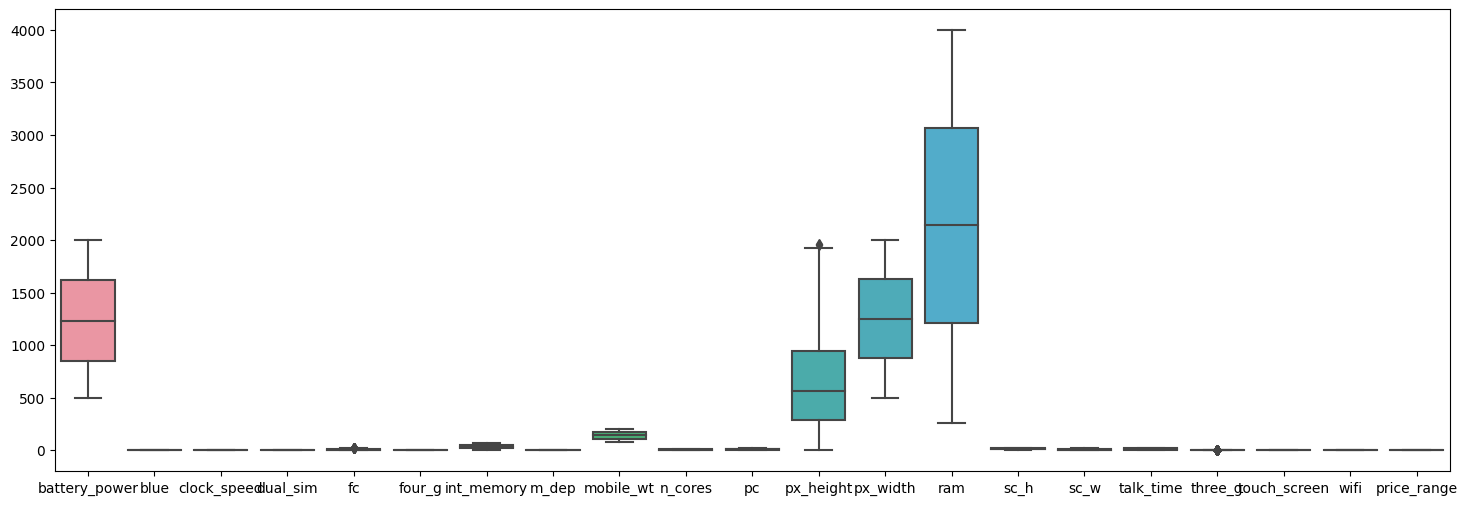

In [10]:
plt.figure(figsize = (18,6))
sns.boxplot( data= df)

O grafico acima é mais um recurso para mostrar que existe outliers no atributo "px_height" e iremos fazer o tratamento dele abaixo.

Continuação... - Tratar os outliers depois separa em conjunto de treino e teste.